¿Qué región fue la más afectada? Agrupar por geo_level_1_id, geo_level_2_id y geo_level_3_id 

In [113]:
import datetime as datetime
import pandas as pd
import numpy as np

In [114]:
df = pd.read_csv('dataset_v1')
df = df.drop(columns=['Unnamed: 0'])
df

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,False,False,False,False,False,False,False,False,False,3
1,28830,8,900,2812,2,10,8,7,o,r,...,False,False,False,False,False,False,False,False,False,2
2,94947,21,363,8973,2,10,5,5,t,r,...,False,False,False,False,False,False,False,False,False,3
3,590882,22,418,10694,2,10,6,5,t,r,...,False,False,False,False,False,False,False,False,False,2
4,201944,11,131,1488,3,30,8,9,t,r,...,False,False,False,False,False,False,False,False,False,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,...,False,False,False,False,False,False,False,False,False,2
260597,669485,17,715,2060,2,0,6,5,t,r,...,False,False,False,False,False,False,False,False,False,3
260598,602512,17,51,8163,3,55,6,7,t,r,...,False,False,False,False,False,False,False,False,False,3
260599,151409,26,39,1851,2,10,14,6,t,r,...,False,False,False,False,False,False,False,False,False,2


In [115]:
df_regiones_level_1 = df.loc[:, ['geo_level_1_id', 'damage_grade']]
df_regiones_level_2 = df.loc[:, ['geo_level_2_id', 'damage_grade']]
df_regiones_level_3 = df.loc[:, ['geo_level_3_id', 'damage_grade']]

In [116]:
total_damaged = df_regiones_level_1['damage_grade'].count()

## Nivel 1

<AxesSubplot:title={'center':'Cantidad de edificios dañados por area (nivel 1)'}, xlabel='Nivel geografico 1'>

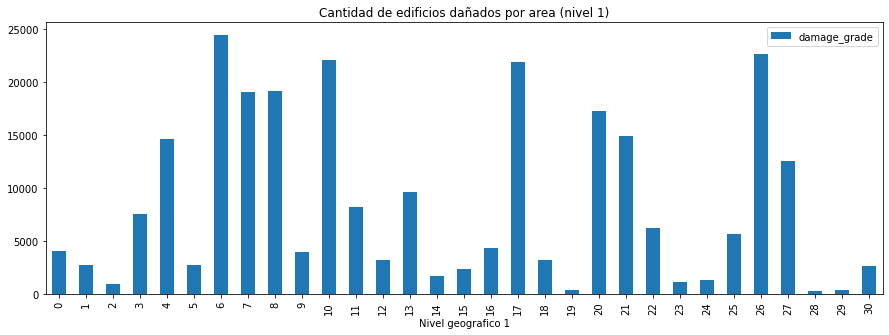

In [117]:
cant_regiones_level_1 = df_regiones_level_1.groupby('geo_level_1_id').count()
cant_regiones_level_1.plot(kind='bar', figsize=(15, 5), xlabel = "Nivel geografico 1", title="Cantidad de edificios dañados por area (nivel 1)")

<AxesSubplot:title={'center':'Nivel de daño total en nivel 1'}, xlabel='Nivel geografico 1'>

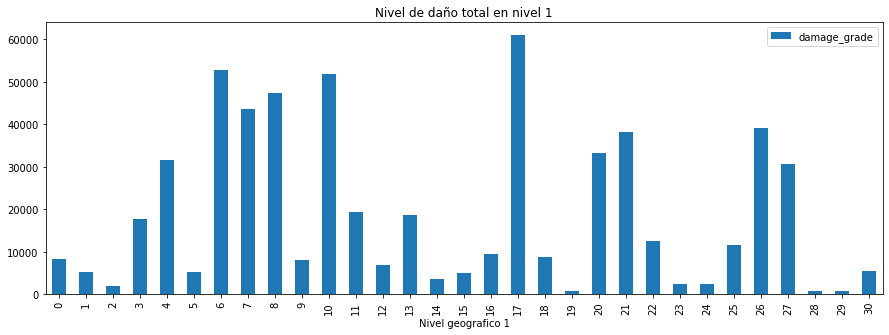

In [118]:
damage_grade_level_1 = df_regiones_level_1.groupby('geo_level_1_id').sum()
damage_grade_level_1.plot(kind='bar', figsize=(15,5), xlabel="Nivel geografico 1", title="Nivel de daño total en nivel 1")

<AxesSubplot:xlabel='Nivel geografico 1'>

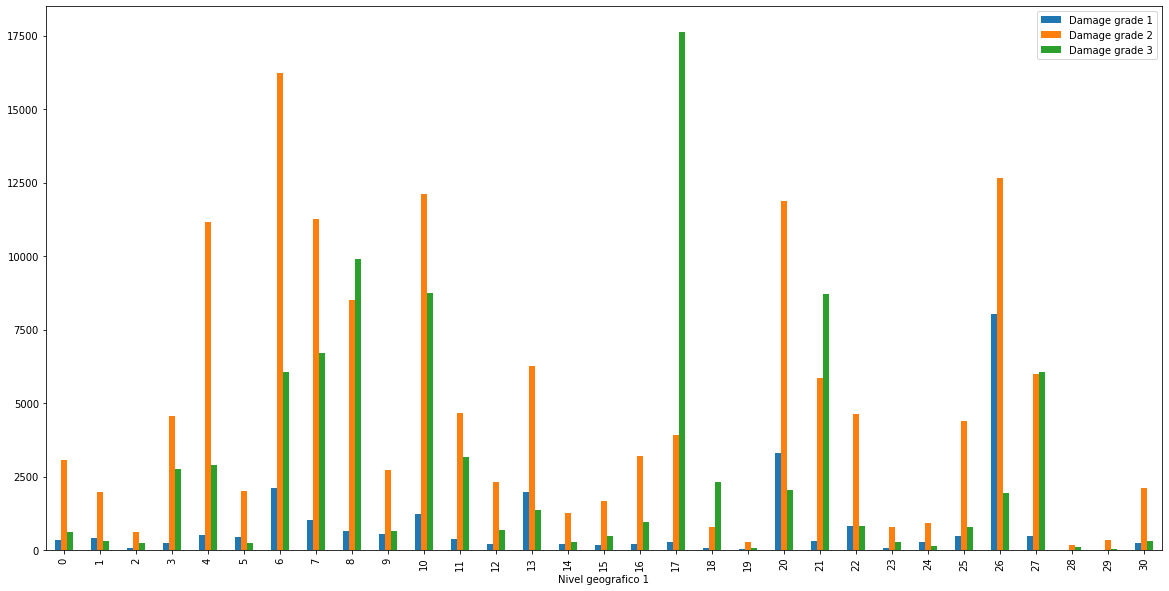

In [119]:
damage_1_level_1 = df_regiones_level_1.loc[df_regiones_level_1['damage_grade'] == 1].groupby('geo_level_1_id').count().rename(columns={'damage_grade': 'Damage grade 1'})
damage_2_level_1 = df_regiones_level_1.loc[df_regiones_level_1['damage_grade'] == 2].groupby('geo_level_1_id').count().rename(columns={'damage_grade': 'Damage grade 2'})
damage_3_level_1 = df_regiones_level_1.loc[df_regiones_level_1['damage_grade'] == 3].groupby('geo_level_1_id').count().rename(columns={'damage_grade': 'Damage grade 3'})

damage_grades_level_1 = cant_regiones_level_1.join(damage_1_level_1, how='left').join(damage_2_level_1, how='left')\
                                              .join(damage_3_level_1, how='left').drop(columns=['damage_grade']).fillna(0)
damage_grades_level_1.plot(kind='bar', figsize=(20,10),
                           xlabel="Nivel geografico 1")

## Nivel 2

<AxesSubplot:title={'center':'Cantidad de edificios dañados por area (nivel 2)'}, xlabel='Nivel geografico 2'>

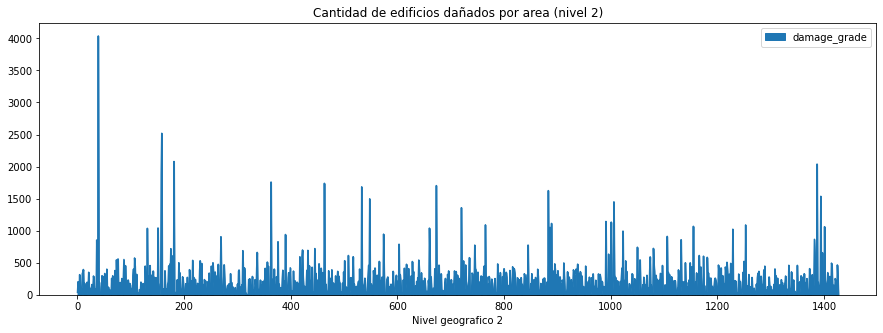

In [120]:
cant_regiones_level_2 = df_regiones_level_2.groupby('geo_level_2_id').count()
cant_regiones_level_2.plot(kind='area', figsize=(15,5),xlabel = "Nivel geografico 2", title="Cantidad de edificios dañados por area (nivel 2)")

<AxesSubplot:title={'center':'Nivel de daño total en nivel 2'}, xlabel='Nivel geografico 2'>

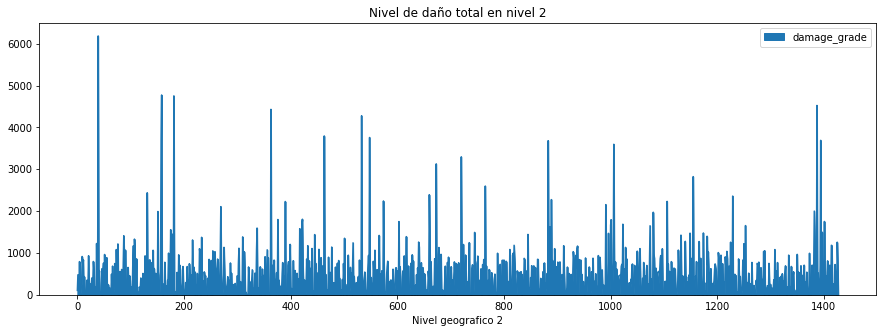

In [121]:
damage_grade_level_2 = df_regiones_level_2.groupby('geo_level_2_id').sum()
damage_grade_level_2.plot(kind='area', figsize=(15,5), xlabel="Nivel geografico 2", title="Nivel de daño total en nivel 2")

In [122]:
cant_regiones_level_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1414 entries, 0 to 1427
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   damage_grade  1414 non-null   int64
dtypes: int64(1)
memory usage: 22.1 KB


Tener en cuenta que este dataframe tiene 1414 columnas y el rango original de valores para 'geo_level_2_id'
es entre 0 y 1427 (rango de 1428 valores). Hay filas faltantes: implica que no hay datos registrados de ciertas
regiones o que directamente no hubo daños?

<AxesSubplot:xlabel='Nivel geografico 2'>

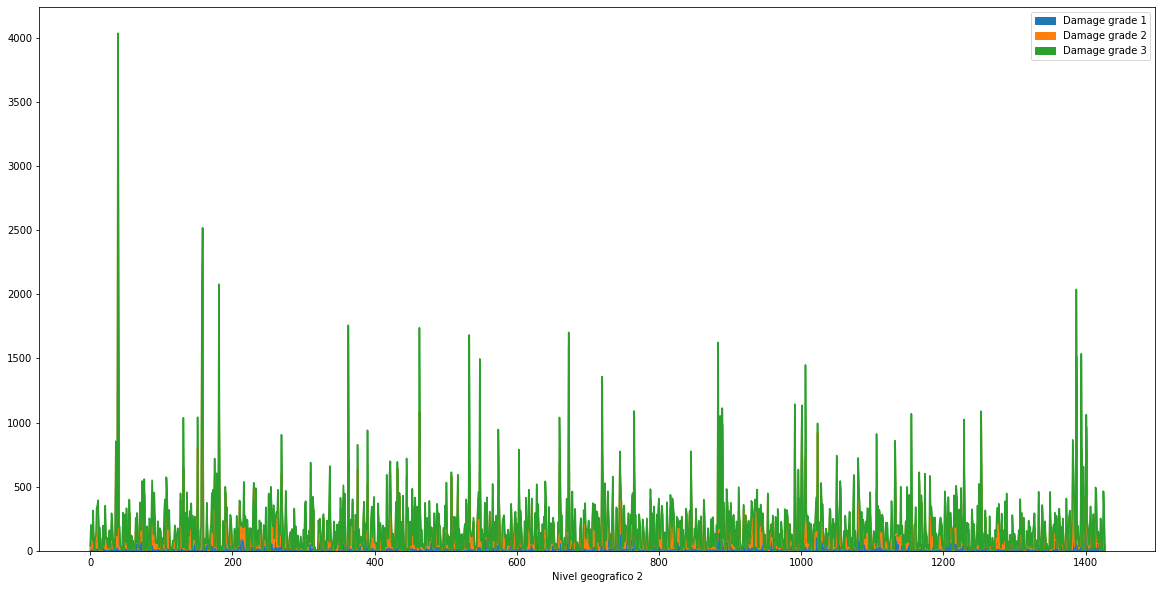

In [123]:
damage_1_level_2 = df_regiones_level_2.loc[df_regiones_level_2['damage_grade'] == 1].groupby('geo_level_2_id').count().rename(columns={'damage_grade': 'Damage grade 1'})
damage_2_level_2 = df_regiones_level_2.loc[df_regiones_level_2['damage_grade'] == 2].groupby('geo_level_2_id').count().rename(columns={'damage_grade': 'Damage grade 2'})
damage_3_level_2 = df_regiones_level_2.loc[df_regiones_level_2['damage_grade'] == 3].groupby('geo_level_2_id').count().rename(columns={'damage_grade': 'Damage grade 3'})

damage_grades_level_2 = cant_regiones_level_2.join(damage_1_level_2, how='left').join(damage_2_level_2, how='left')\
                                             .join(damage_3_level_2, how='left').drop(columns=['damage_grade']).fillna(0)
damage_grades_level_2.plot(kind='area', figsize=(20,10),
                           xlabel="Nivel geografico 2")

## Nivel 3

<AxesSubplot:title={'center':'Cantidad de edificios dañados por area (nivel 3)'}, xlabel='Nivel geografico 3'>

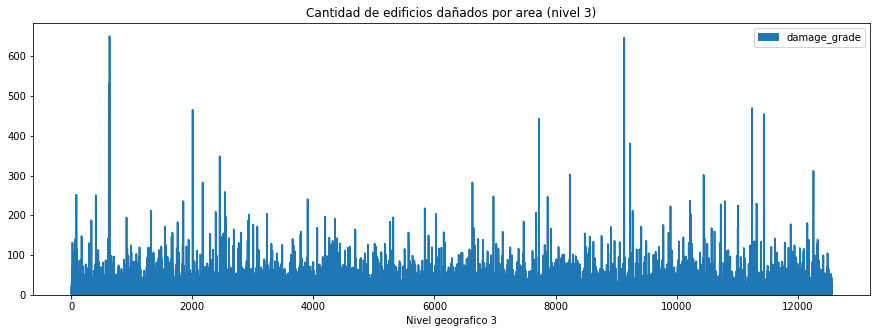

In [124]:
cant_regiones_level_3 = df_regiones_level_3.groupby('geo_level_3_id').count()
cant_regiones_level_3.plot(kind='area', figsize=(15,5),xlabel = "Nivel geografico 3", title="Cantidad de edificios dañados por area (nivel 3)")

<AxesSubplot:title={'center':'Nivel de daño total en nivel 3'}, xlabel='Nivel geografico 3'>

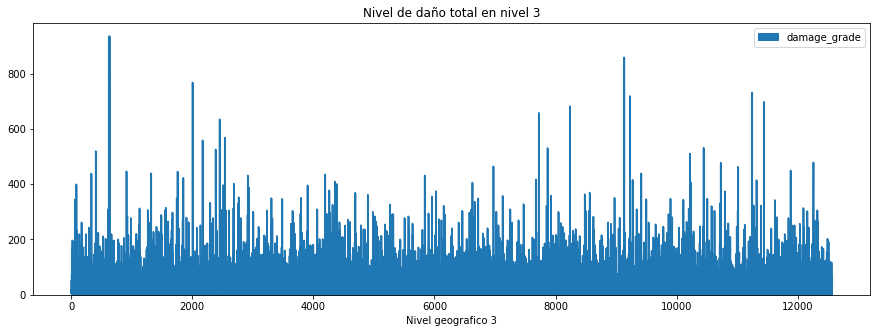

In [125]:
damage_grade_level_3 = df_regiones_level_3.groupby('geo_level_3_id').sum()
damage_grade_level_3.plot(kind='area', figsize=(15,5), xlabel="Nivel geografico 3", title="Nivel de daño total en nivel 3")

In [126]:
cant_regiones_level_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11595 entries, 0 to 12567
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   damage_grade  11595 non-null  int64
dtypes: int64(1)
memory usage: 181.2 KB


Ocurre lo mismo que con el level 2. En este caso tenemos 11595 rows de regiones de level 2, pero el rango original
es 0-12567 (12568 valores posibles), por lo que faltan datos de algunas regiones

<AxesSubplot:xlabel='Nivel geografico 3'>

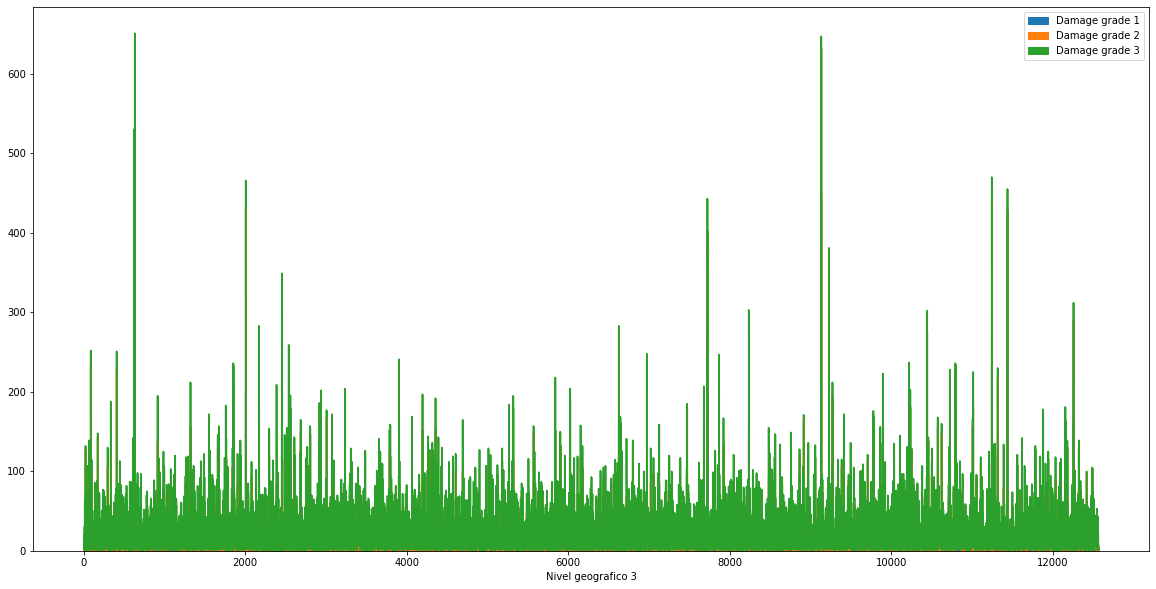

In [130]:
damage_1_level_3 = df_regiones_level_3.loc[df_regiones_level_3['damage_grade'] == 1].groupby('geo_level_3_id').count().rename(columns={'damage_grade': 'Damage grade 1'})
damage_2_level_3 = df_regiones_level_3.loc[df_regiones_level_3['damage_grade'] == 2].groupby('geo_level_3_id').count().rename(columns={'damage_grade': 'Damage grade 2'})
damage_3_level_3 = df_regiones_level_3.loc[df_regiones_level_3['damage_grade'] == 3].groupby('geo_level_3_id').count().rename(columns={'damage_grade': 'Damage grade 3'})

damage_grades_level_3 = cant_regiones_level_3.join(damage_1_level_3, how='left').join(damage_2_level_3, how='left')\
                                             .join(damage_3_level_3, how='left').drop(columns=['damage_grade']).fillna(0)
damage_grades_level_3.plot(kind='area', figsize=(20,10),
                           xlabel="Nivel geografico 3")

In [128]:
damage_grades_level_3.describe()

,Damage grade 1,Damage grade 2,Damage grade 3
count,11595.000000,11595.000000,11595.000000
mean,2.166796,12.786460,7.522035
std,10.289535,17.605492,12.530856
min,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000
50%,0.000000,7.000000,2.000000
75%,1.000000,17.000000,9.000000
max,450.000000,343.000000,158.000000
